<a href="https://colab.research.google.com/github/sgirabin/nyp-iti103-assignment/blob/main/ITI103_Assignment1_IsakRabin_4466624P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ITI103: Essentials Machine Learning**

---

**Assignment 1**
- **Name**      : **Isak Rabin**
- **Student ID**: **4466624P**



# Background

**HousePricePredict Inc.**, a tech startup specializing in predictive analytics for real estate, aims to develop a robust machine learning model that accurately predicts house prices.

# Step 1: Machine Learning Problem Formulation

## 1.1. Problem Statement:

We want to develop machine learning modelthat can **predict the sale price of a house (`sale price`)** based on features such as size, quality, age, and location.

This model will help stakeholders like real estate agents, home buyers, and property investors make more informed pricing decisions.


## 1.2. Ideal Outcome

The ideal outcome is a reliable and accurate model that can:

- Estimate house prices with minimal error
- Generalize well to unseen data
- Highlight which features most influence house prices


## 1.3. Evaluation Metrics:

- **Success Metric**:
  - Predictions are close to actual sale prices (low RMSE and high R² score)
  - The model performs well on validation/test data.

    The model should provide house price estimates that are, on average, within 5-10% of the actual sale prices for at least 80% of dataset.
  
    This level of accuracy will enable HousePricePredict Inc. to offer competitive and reliable services, attract a large customer base, and support sound investment decisions.

  - Insights from the model are interpretable and actionable

- **Failure Metric**:

  - The model overfits and performs poorly on unseen data
  - Predictions have high variance or are inaccurate

    The model consistently produces house price estimates that deviate by more than 20% from actual sale prices, or exhibits significant bias towards over- or under-valuation in specific neighborhoods or property types.
  
    This level of inaccuracy would lead to customer dissatisfaction, loss of trust in the service, and potential financial losses due to poor investment recommendations.

  - Important features are ignored or misused

## 1.4. Expected Model Output:

The model will take a set of input features describing a house and output a single predicted value representing the estimated `SalePrice` of that house.

## 1.5. Usage of the Output

The predicted price can be used by:
- **Sellers** – to set a competitive listing price
- **Buyers** – to evaluate if a house is fairly priced
- **Agents** – to provide evidence-based price recommendations

## 1.6. Heuristic Approach (without Machine Learning)

Without machine learning, we would:
- Use average prices per square foot
- Compare manually with similar houses
- Apply fixed pricing rules based on location and size

## 1.7. Machine Learning Framing

### 1.7.1. Type of Machine Learning Problem:

This is a **Supervised Learning** problem because we are training the model on a labeled dataset, where each house has known features (input variables) and a known sale price (target variable).

The task is a **Univariate Regression**, as the model predicts a single continuous target variable (`SalePrice`).

Since multiple input features (e.g., `GrLivArea`, `OverallQual`, `YearBuilt`, etc.) are used to predict the target, this is specifically a **Multiple Linear Regression** setting in terms of model structure.

### 1.7.2. Target Variable:

The target variable is ```SalePrice```, representing the sale price of a house in dollars.

This is the value we want to predict.

### 1.7.3. Data for the Model (Input Features):

The data for the model will come from the `housing_pricing.csv` dataset.

This dataset contains features such as:
- **Location**: MSZoning, Neighborhood
- **Size**: LotArea, LotFrontage, GrLivArea, 1stFlrSF, 2ndFlrSF
- **Quality**: OverallQual, OverallCond, KitchenQual, GarageQual
- **Construction**: YearBuilt, YearRemodAdd, HouseStyle
- **Other**: BedroomAbvGr, FullBath, HalfBath, GarageCars

### 1.7.4. Model Output

A single numerical prediction of house price (`SalePrice`)

### 1.7.5. Model Used

We applied four different regression models to solve the house price prediction problem. Each model has distinct characteristics that help us evaluate performance under different assumptions and complexities:

1. **Linear Regression**
     - **What it does**: Assumes a straight-line (linear) relationship between the input features and the sale price.
     - **Why use it**: It is simple, fast to train, and interpretable. It provides a baseline model for comparison with more advanced techniques.

2. **Polynomial Regression**
    - **What it does:** Extends linear regression by adding polynomial terms (e.g., \( x^2, x^3 \)) to model non-linear relationships between the features and the target variable.
    - **Why use it:** It can capture more complex patterns in the data that a straight line cannot, which may improve predictive accuracy if there are curved trends.

3. **Ridge Regression** (L2 Regularization)
    - **What it does:** Similar to linear regression but adds a penalty for large coefficient values (squared magnitude). This helps **reduce overfitting**.
    - **Why use it:** When multicollinearity (correlated features) or overfitting is a concern, Ridge helps to constrain the model and improve generalization.

4. **Lasso Regression** (L1 Regularization)
    - **What it does:** Like Ridge, but the penalty is on the **absolute** value of coefficients. Lasso can shrink some coefficients to zero, effectively **removing less important features**.
    - **Why use it:** It helps with both overfitting and **feature selection**, making the model simpler and potentially more robust.


These models offer a spectrum from simplicity (Linear) to complexity management (Ridge/Lasso) and non-linear flexibility (Polynomial). By comparing them, we can identify which model best balances accuracy and interpretability for this housing price prediction task.

# Step 2: Data Exploration and Understanding

## 2.1. Pre-requisite

For this assignment, we are going to use assigned dataset, which can be donwloaded from the following google drive: https://drive.usercontent.google.com/download?id=1mIUevQaSjSKkJs0mIL6HlVmMOs5ijgzy&export=download&authuser=0&confirm=t&uuid=023ff28c-a0a4-4e1e-b4c7-9a1ea2f49b82&at=AN8xHoo6UMWRdlwhaavQ1NnPn4Iz:1751114159363

The file contains historical housing sale price.

In [485]:
#download the dataset from google drive and save as house_pricing.csv
!wget "https://drive.usercontent.google.com/download?id=1mIUevQaSjSKkJs0mIL6HlVmMOs5ijgzy&export=download&authuser=0&confirm=t&uuid=023ff28c-a0a4-4e1e-b4c7-9a1ea2f49b82&at=AN8xHoo6UMWRdlwhaavQ1NnPn4Iz:1751114159363" -O house_pricing.csv

--2025-07-06 12:49:22--  https://drive.usercontent.google.com/download?id=1mIUevQaSjSKkJs0mIL6HlVmMOs5ijgzy&export=download&authuser=0&confirm=t&uuid=023ff28c-a0a4-4e1e-b4c7-9a1ea2f49b82&at=AN8xHoo6UMWRdlwhaavQ1NnPn4Iz:1751114159363
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [application/octet-stream]
Saving to: ‘house_pricing.csv’

house_pricing.csv   100%[===================>] 449.88K  --.-KB/s    in 0.005s  

2025-07-06 12:49:23 (95.3 MB/s) - ‘house_pricing.csv’ saved [460676/460676]



In [486]:
#check if we have sucessfully downloaded our dataset
!head house_pricing.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

## 2.2. Import libraries

First, we need to import necessary library for our data processing and visualisation.

We’ll use NumPy and Pandas for data processing, and use Seaborn, a library built on Matplotlib that makes it easy to create informative and attractive statistical plots.

Visualization helps reveal trends and patterns, even for non-programmers.

In [487]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2.2. Load the Dataset

Next, We will load the data that downloaded earlier, and display the first few rows by using `head()` function.

`head()` function by default return the first 5 rows of dataset.

In [488]:
# Load and Inspect Data
file_path = "house_pricing.csv"
sales_data = pd.read_csv(file_path)

# Display first few rows
sales_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.3. Understanding the Dataset

At first, we want to know how many records available in our dataset. For this, we are going to use `shape` function which will return number of records in our dataset.

In [489]:
# Display our dataset size
sales_data.shape

(1460, 81)

Now, we know that our dataset consist of **1460 rows** and **81 columns (features)**

Next, we also want to understand the definition of each column from our dataset. We will use `info()` function for this purpose.

In [490]:
# Print Schema
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As shown above, we can see 81 columns which consist from **80 features** and 1 index column.

To understand better, we will check what are **numerical** features and what are **categorical** features.

In [491]:
print("\nNumerical features:")
print(sales_data.select_dtypes(include=['number']).columns.tolist())

print("\nCategorical features:")
print(sales_data.select_dtypes(include=['object']).columns.tolist())


Numerical features:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firep

We also want to know what are the missing value. For this, we are going to use `describe` function which will return the statistical summary for numerical fields/features.

In [492]:
# Generate descriptive statistics for numerical features
print(sales_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

Referring the `describe` output, we can tell there are columns with missing data: `LotFrontage`  (1201 records count), `MasVnrArea` (1452 records count).

However, there are some **categorical** features, so lets check what top 10 missing values in our features.

In [493]:
print("\nMissing values (Top 10):")
print(sales_data.isnull().sum().sort_values(ascending=False).head(10))


Missing values (Top 10):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


## 2.4. Visualise Dataset to Gain Insights

### 2.4.1 Distribution of Numerical Features (Histogram Analysis)

First, we want understand the **distribution**, **spread**, **skewness**, and **presence of outliers** for each numerical column.

We used `sales_data.hist(bins=50)` to visualize the distribution of all numerical features.

Histograms help us understand:
- The **distribution shape** (normal, skewed, etc.),
- Presence of **outliers**,
- **Range** and **common values**,
- Whether **transformation** or **feature engineering** is needed.


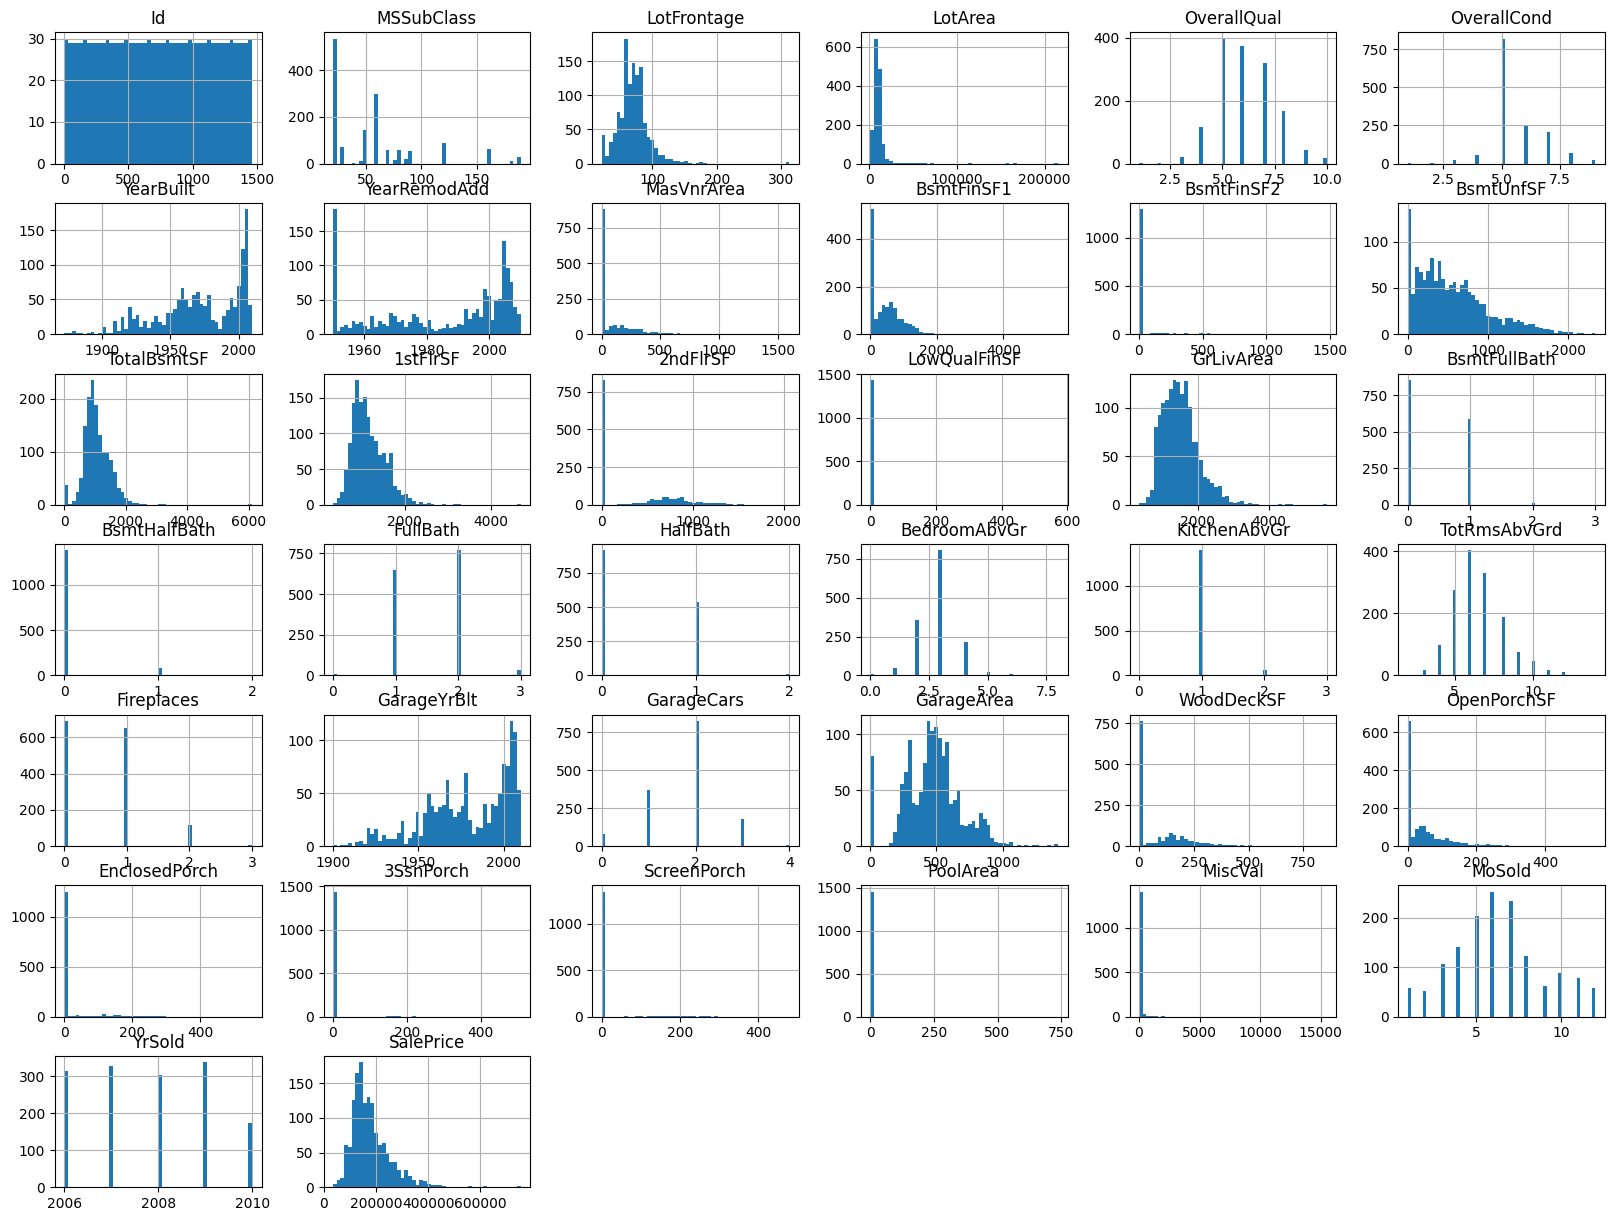

In [494]:
sales_data.hist(bins=50, figsize=(20,15))
plt.show()

**Key Observations**:

1. **SalePrice**
    - **Right-skewed** distribution.
    - Most homes are priced between **$100,000–$300,000**.
    - *Implication*: Consider log-transforming to normalize before modeling.

2. **LotArea**
    - Highly skewed with outliers (some > 200,000).
    - Could benefit from **log transformation** or **capping** extreme values.

3. **OverallQual & OverallCond**
    - Ordinal features with integer values from 1 to 10.
    - Majority of homes have values between **5 and 7**.
    - Keep as-is (useful ordinal predictor).

4. **GarageCars, FullBath, HalfBath, Fireplaces**
    - Discrete count values.
    - Common configurations:
        - 2-car garages,
        - 2 bathrooms,
        - 1 fireplace.
    - *Implication*: Strong relationship with livability → predictive.

5. **GarageArea, GrLivArea, TotalBsmtSF**
    - Continuous but **right-skewed**.
    - Strong candidates for correlation with SalePrice.
    - Consider outlier treatment if needed.

6. **YearBuilt, YearRemodAdd**
    - Most houses were built or renovated after **1950**.
    - Newer homes more common and potentially higher priced.

7. **BsmtFinSF1, BsmtUnfSF, 2ndFlrSF**
    - Many values at **0** indicate absence of a basement or second floor.
    - Binary features could be added (e.g., `HasBsmt`).

8. **PoolArea, MiscVal, 3SsnPorch**
    - Almost all values are **0**.
    - Very low variance → may not be useful for prediction.
    - Consider dropping or binarizing (e.g., `HasPool`).


**Summary**:

| Feature Group | Pattern | Suggested Action |
|---------------|---------|------------------|
| SalePrice | Right-skewed | Try `np.log1p()` transform |
| LotArea, GrLivArea | Outliers & skew | Log-transform or cap |
| Low-variance features (e.g., PoolArea) | Mostly zero | Drop or binarize |
| Ordinal features (OverallQual, KitchenQual) | Clean discrete values | Keep as integers |
| YearBuilt, YearRemodAdd | Recency pattern | Strong predictor, keep |


### 2.4.2. Distribution of `SalePrice` (Detailed KDE Histogram)

To better understand how SalePrice values are distributed across the dataset, we used the following plot:

```python
sns.histplot(sales_data['SalePrice'], kde=True)

We adds a **KDE curve (Kernel Density Estimation)** to approximate the probability distribution of the data.

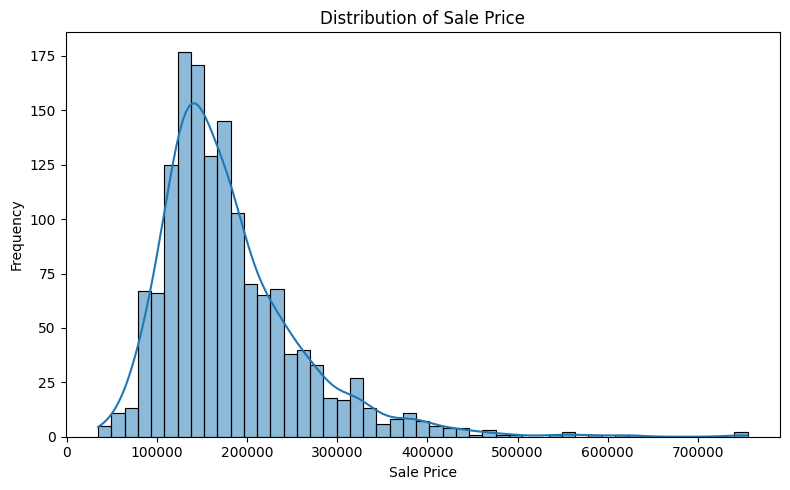

In [495]:
# Plot distribution of SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(sales_data['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Key Observation from `SalePrice` distribution**:

- The distribution is right-skewed (long tail to the right).
- Most homes are sold between $100,000 and $250,000.
- There are a few expensive houses above $500,000, which may act as outliers.
- A log transformation (np.log1p(SalePrice)) might be beneficial to normalize the distribution for regression models.


To reduce right skewness in the original `SalePrice` and make the data more **normally distributed**, we applied a **log transformation** using `np.log1p()`:

```python
log_sale_price = np.log1p(sales_data['SalePrice'])

```
This transformation:
- Compresses the high-value outliers,
- Makes the distribution more symmetric (closer to Gaussian),
- Helps linear models perform better.

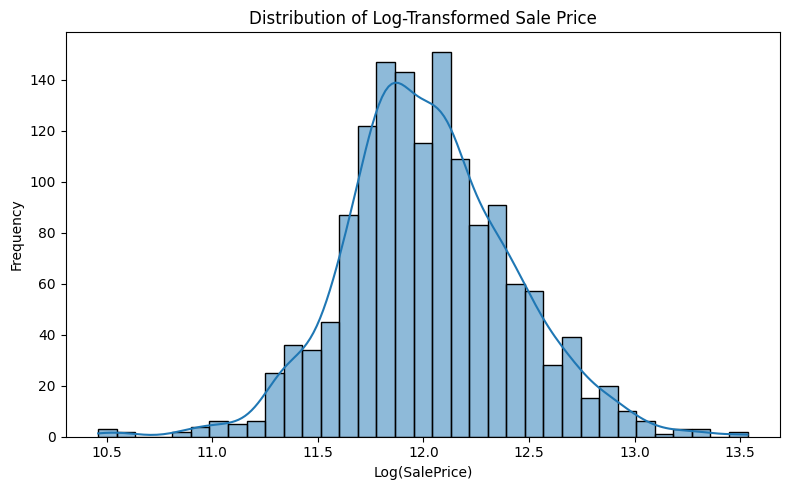

In [496]:
# _Note: This transformation is shown here only for visualization. We will apply it during Step 3 (Data Preparation) before model training._

plt.figure(figsize=(8, 5))

# Create a temporary transformed version (without modifying the dataset)
log_sale_price = np.log1p(sales_data['SalePrice'])

# Plot log-transformed SalePrice
sns.histplot(log_sale_price, kde=True)

plt.title("Distribution of Log-Transformed Sale Price")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The original `SalePrice` distribution was right-skewed, indicating that a small number of houses were sold at significantly higher prices.  
By applying a logarithmic transformation (`log1p`), the distribution becomes much more **normally distributed** (bell-shaped), which is beneficial for linear regression models.  
This transformation helps to:
- Reduce the impact of extreme outliers.
- Improve model performance and stability.
- Make the relationship between features and the target more linear.

This transformation is only visualized here; we will apply it to the dataset during **Data Preparation (Step 3)**.


### 2.4.3. Correlation Analysis



#### 2.4.3.1. Numerical Features Heatmap

To understand which numerical features are most strongly associated with the target variable `SalePrice`.  This helps us:
- Identify strong predictors
- Detect potential multicollinearity between predictors
- Guide feature selection for modeling (Step 4)

We computed a correlation matrix and visualized the top 10 features.

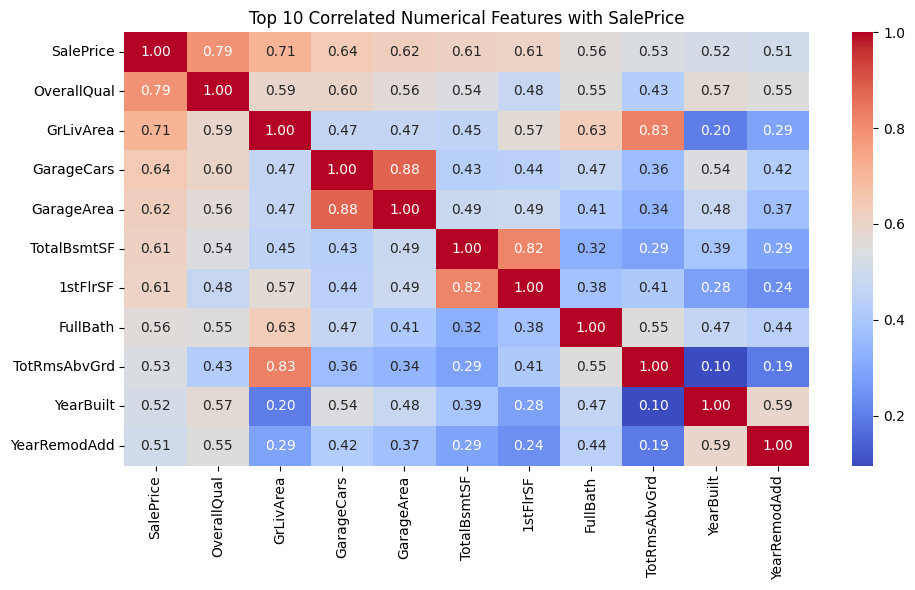

In [497]:
# Plot correlation heatmap for top 10 numerical features most correlated with SalePrice
corr_matrix = sales_data.corr(numeric_only=True)
top_corr_features = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(11).index

plt.figure(figsize=(10, 6))
sns.heatmap(sales_data[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Correlated Numerical Features with SalePrice")
plt.tight_layout()
plt.show()

**Key observations:**
- **`OverallQual`** has the strongest positive correlation with `SalePrice` (0.79), indicating that overall material and finish quality significantly affects house price.
- **`GrLivArea`** (above-ground living area) also shows a strong positive correlation (0.71), as larger homes typically command higher prices.
- Features related to garages (**`GarageCars`** and **`GarageArea`**), basement (**`TotalBsmtSF`**), and number of bathrooms (**`FullBath`**) also show moderate positive correlations.
- **`YearBuilt`** and **`YearRemodAdd`** have positive but weaker correlations, suggesting that newer or recently renovated homes tend to sell for more.

This insight helps in **feature selection** for our regression models by highlighting which numerical features are most predictive of house price.

#### 2.4.3.2. Encoded Ordinal Categorical Features Heatmap

While standard correlation only works on numerical data, several ordinal categorical features (like `ExterQual` and `KitchenQual`) convey ordered information and are likely to influence housing price.

We temporarily encoded these features using predefined quality scales (e.g., Poor = 1, Excellent = 5), and then computed their correlation with `SalePrice`. This helps identify which categorical features are most influential.

*Note: We will reapply and clean all encoding properly in data preparation (Step 3).*



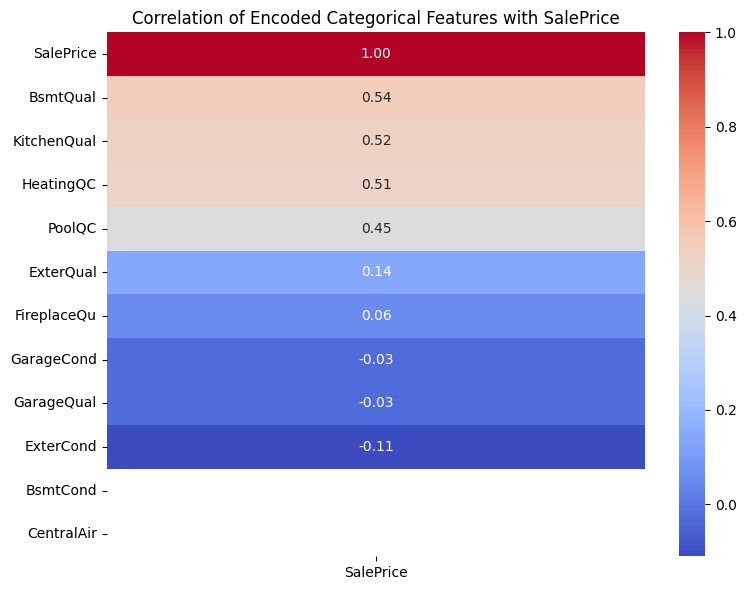

In [498]:
# Copy the DataFrame to preserve original
encoded_data = sales_data.copy()

# Define mappings for ordinal categorical features
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
yes_no_map = {'N': 0, 'Y': 1}

# Ordinal columns to encode
ordinal_cols = {
    'ExterQual': quality_map,
    'ExterCond': quality_map,
    'KitchenQual': quality_map,
    'HeatingQC': quality_map,
    'BsmtQual': quality_map,
    'BsmtCond': quality_map,
    'FireplaceQu': quality_map,
    'GarageQual': quality_map,
    'GarageCond': quality_map,
    'PoolQC': quality_map,
    'CentralAir': yes_no_map
}

# Apply encoding
for col, mapping in ordinal_cols.items():
    encoded_data[col] = encoded_data[col].map(mapping)

# Drop rows with missing values in encoded columns
encoded_data_clean = encoded_data.dropna(subset=ordinal_cols.keys())

# Compute correlation of encoded ordinal categorical features with SalePrice
cat_corr = encoded_data_clean[ordinal_cols.keys()].join(encoded_data_clean['SalePrice']).corr()
top_cat_corr = cat_corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_cat_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Encoded Categorical Features with SalePrice")
plt.tight_layout()
plt.show()

**Key observations**:

- **`BsmtQual` (0.54)**, **`KitchenQual` (0.52)**, and **`HeatingQC` (0.51)** have the **strongest positive correlations**, indicating that homes with higher-rated basements, kitchens, and heating systems tend to fetch higher prices.
- **`PoolQC` (0.45)** also shows a moderate positive influence on price, though fewer homes likely have pools (potential outliers).
- Some features such as **`GarageQual`**, **`GarageCond`**, **`ExterCond`**, **`ExterQual`**, and **`FireplaceQu`** show **very weak or even negative correlations**, suggesting they may have limited predictive power individually.
- **`CentralAir`, `BsmtCond`**, surprisingly, shows almost no correlation in this dataset.

This insight helps prioritize which categorical quality-related features to retain when building regression models. Only features with meaningful correlation (typically `|r| > 0.3`) should be considered strong candidates.

### 2.4.4. Bar Charts for Nominal Categorical Features

Nominal categorical features (e.g., `Neighborhood`, `HouseStyle`, `MSZoning`) don't have a natural order and are not suitable for ordinal encoding. Instead, we visualize their impact on `SalePrice` by plotting the **average price per category**.

These visualizations help us identify which nominal features should be included (via one-hot encoding) in Data Preparation (Step 3).

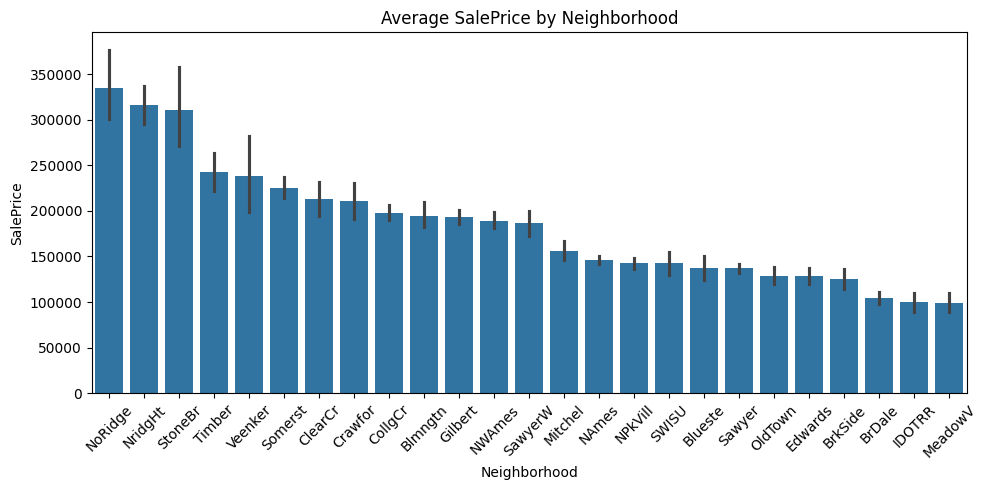

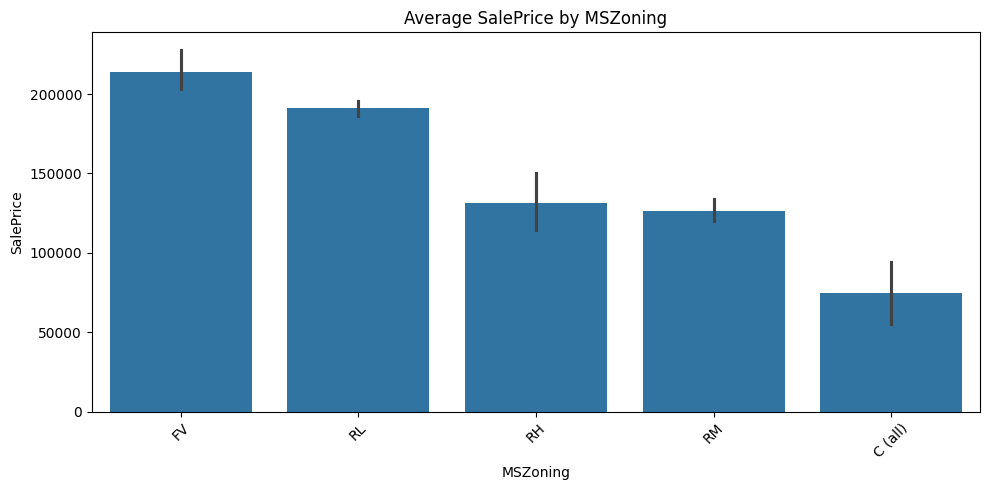

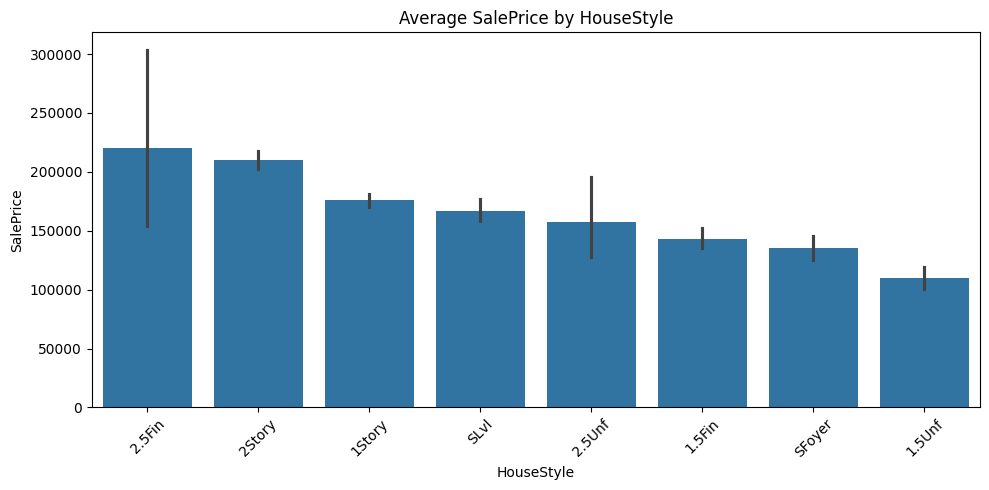

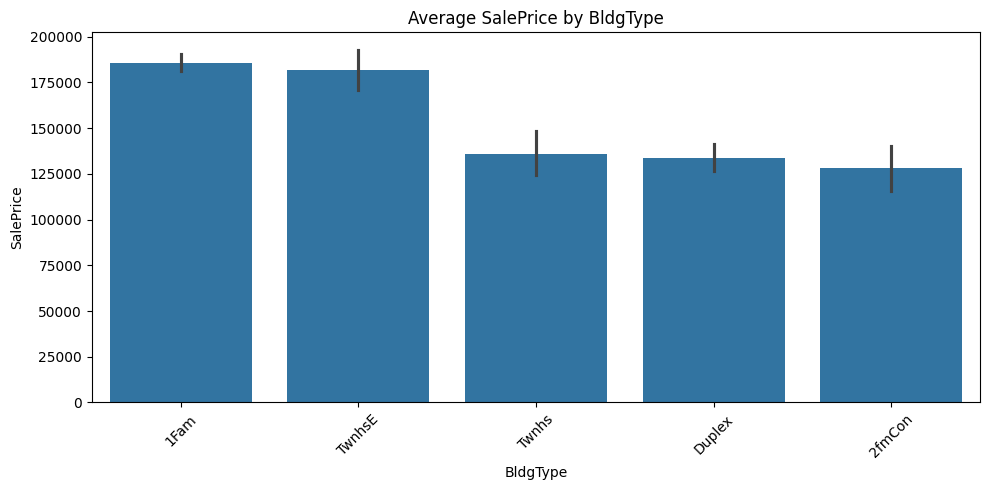

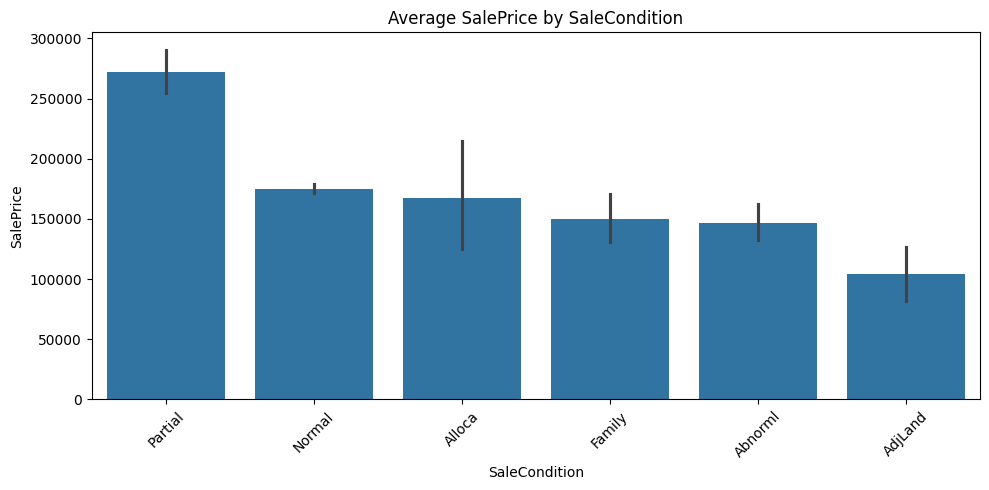

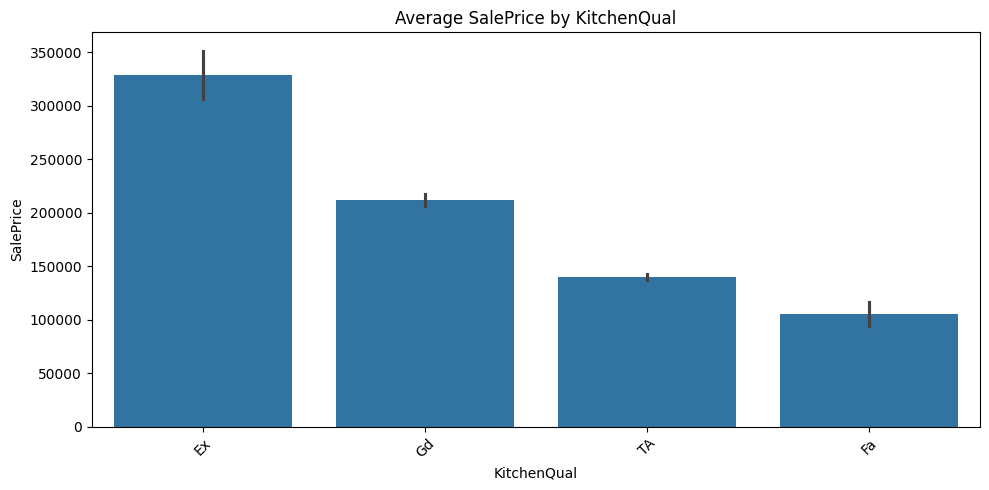

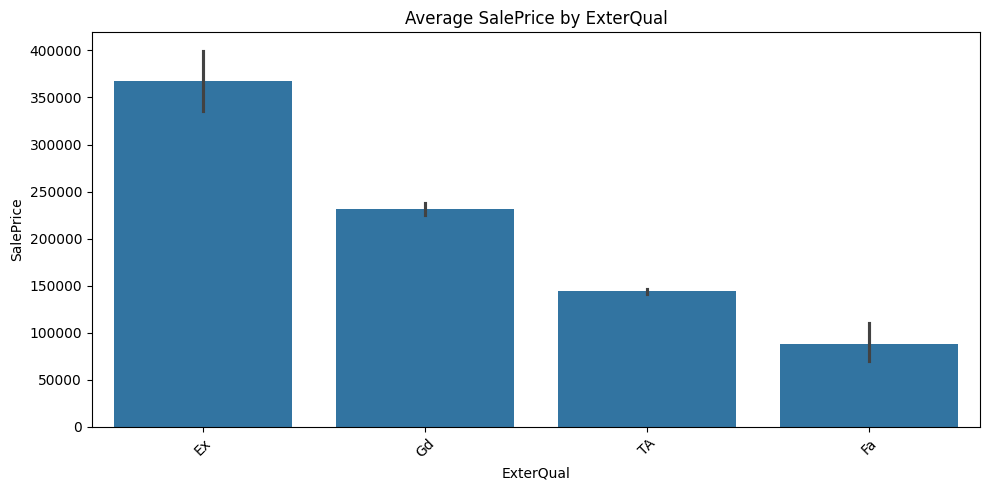

In [499]:
# List of important categorical features
cat_features = ['Neighborhood', 'MSZoning', 'HouseStyle', 'BldgType', 'SaleCondition', 'KitchenQual', 'ExterQual']

# Plot bar chart of average SalePrice for each category in each feature
for col in cat_features:
    plt.figure(figsize=(10, 5))
    order = sales_data.groupby(col)['SalePrice'].mean().sort_values(ascending=False).index
    sns.barplot(data=sales_data, x=col, y='SalePrice', order=order)
    plt.title(f'Average SalePrice by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Key insights**:
- Nominal categorical features like `Neighborhood`, `HouseStyle`, and `SaleCondition` demonstrate clear differentiation in average `SalePrice`.
- Certain neighborhoods (e.g., `NoRidge`, `NridgHt`, `StoneBr`) consistently fetch higher prices.
- Zoning type and house style also influence price significantly.
- `SaleCondition` shows that houses sold under normal conditions tend to be priced higher than others.


# Step 3: Data Preparation

## 3.1. Handle Missing Values

**Strategy**:

- Numerical columns: Fill with median (robust to outliers).
- Categorical columns: Fill with mode.

In [500]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(sales_data)
sales_data_cleaned = sales_data.dropna(thresh=threshold, axis=1).copy()

In [501]:
# Separate numerical and categorical columns
num_cols = sales_data_cleaned.select_dtypes(include=["int64", "float64"]).columns
cat_cols = sales_data_cleaned.select_dtypes(include=["object"]).columns

# Fill missing values for numerical columns with median
sales_data_cleaned.loc[:, num_cols] = sales_data_cleaned[num_cols].fillna(sales_data_cleaned[num_cols].median())

# Fill missing values for categorical columns with mode
for col in cat_cols:
    sales_data_cleaned.loc[:, col] = sales_data_cleaned[col].fillna(sales_data_cleaned[col].mode()[0])

## 3.2. Feature Engineering – Adding Extra Feature

To enhance our model's understanding of a house's livability, we introduce a new feature called
-  `TotalBathrooms`: This feature aggregates all bathrooms into one weighted score to better represent the livability of the house.

    ```
        TotalBathrooms = FullBath + (0.5 × HalfBath) + BsmtFullBath + (0.5 × BsmtHalfBath)
    ```

    - **FullBath / HalfBath**: Bathrooms above ground.
    - **BsmtFullBath / BsmtHalfBath**: Bathrooms in the basement.
    - **Half baths** are weighted as 0.5 to reflect their lower utility compared to full baths.

- `AgeOfHouse`: Assuming the dataset was compiled in 2025, this feature calculates how old the house is at the time of sale. It helps the model capture depreciation or renovation effects.

    ```
        AgeOfHouse = 2025 - YearBuilt
    ```

- `TotalPorchSF`: This feature sums all porch areas, providing a better sense of outdoor amenities.

    ```
        TotalPorchSF = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
    ```

- `TotalSF`: A holistic representation of the house's total interior space.

    ```
        TotalSF = TotalBsmtSF + 1stFlrSF 2ndFlrSF
    ```

In [502]:
# Add Extra Feature: TotalBathrooms
# TotalBathrooms = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5 * BsmtHalfBath
if all(col in sales_data_cleaned.columns for col in ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']):
    sales_data_cleaned['TotalBathrooms'] = (
        sales_data_cleaned['FullBath'] +
        0.5 * sales_data_cleaned['HalfBath'] +
        sales_data_cleaned['BsmtFullBath'] +
        0.5 * sales_data_cleaned['BsmtHalfBath']
    )
else:
    print("Required columns for TotalBathrooms are missing.")

# Add Extra Feature: AgeOfHouse (Assuming year is 2025 from dataset context)
if 'YearBuilt' in sales_data_cleaned.columns:
    sales_data_cleaned['AgeOfHouse'] = 2025 - sales_data_cleaned['YearBuilt']
else:
    print("YearBuilt column missing for AgeOfHouse calculation.")

# Add Extra Feature: TotalPorchSF (Sum of all porch areas)
porch_features = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
if all(col in sales_data_cleaned.columns for col in porch_features):
    sales_data_cleaned['TotalPorchSF'] = sales_data_cleaned[porch_features].sum(axis=1)
else:
    print("One or more porch columns are missing.")

# Add TotalSquareFootage (sum all the SF of floors)
if all(col in sales_data_cleaned.columns for col in ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    sales_data_cleaned['TotalSF'] = (
        sales_data_cleaned['TotalBsmtSF'] +
        sales_data_cleaned['1stFlrSF'] +
        sales_data_cleaned['2ndFlrSF']
    )
else:
    print("One or more floor area columns are missing.")

# Drop original features used in engineered ones
columns_to_drop = [
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',   # replaced by TotalBathrooms
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',                    # replaced by TotalSF
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',  # replaced by TotalPorchSF
    'YearBuilt'  # replaced by AgeOfHouse
]
sales_data_cleaned = sales_data_cleaned.drop(columns=[col for col in columns_to_drop if col in sales_data_cleaned.columns])

# Update column lists
num_cols = sales_data_cleaned.select_dtypes(include=["int64", "float64"]).columns

## 3.3.  Encode Categorical Variables

Strategy:
- Use **One-Hot Encoding** for nominal categorical features (no order).
- Use **Ordinal Encoding** for ordinal categorical features (like `ExterQual`, `KitchenQual`, etc.) where values have rank/meaning.

In [503]:
# Ordinal encoding for quality-related categorical features
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

for col in ['ExterQual', 'KitchenQual', 'GarageQual', 'GarageCond', 'HeatingQC', 'BsmtQual', 'BsmtCond']:
    if col in sales_data_cleaned.columns:
        sales_data_cleaned.loc[:, col] = sales_data_cleaned[col].map(quality_map)

In [504]:
# One-hot encoding for selected nominal categorical features
nominal_features = ['Neighborhood', 'SaleCondition', 'MSZoning', 'BldgType', 'HouseStyle']
sales_data_final = pd.get_dummies(sales_data_cleaned, columns=nominal_features, drop_first=True)

In [505]:
# Display the shape and preview the prepared data
print("Encoded (Final) dataset  shape:", sales_data_final.shape)
sales_data_final.head()

Encoded (Final) dataset  shape: (1460, 107)


,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,False,False,False,True,False,False
1,2,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,False,False,False,False,True,False,False,False,False,False
2,3,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,False,False,False,True,False,False
3,4,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,False,False,False,False,False,True,False,False
4,5,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,False,False,False,False,False,False,False,True,False,False


In [506]:
# Check for invalid values in SalePrice
invalid_entries = sales_data_final[
    (sales_data_final["SalePrice"] <= 0) |
    (sales_data_final["SalePrice"].isnull()) |
    (~np.isreal(sales_data_final["SalePrice"]))
]

# Display any invalid entries, if found
if not invalid_entries.empty:
    print("Invalid entries found in SalePrice:")
    display(invalid_entries)
else:
    print("SalePrice column is clean: No missing, non-numeric, or non-positive values.")

SalePrice column is clean: No missing, non-numeric, or non-positive values.


In [507]:
# Count missing values
missing_count = sales_data_final["SalePrice"].isnull().sum()

# Count non-numeric values (unlikely, but we check for completeness)
non_numeric_count = (~pd.to_numeric(sales_data_final["SalePrice"], errors='coerce').notnull()).sum()

# Count non-positive values (zero or negative)
non_positive_count = (sales_data_final["SalePrice"] <= 0).sum()

# Print results
print("Missing values in SalePrice:", missing_count)
print("Non-numeric values in SalePrice:", non_numeric_count)
print("Non-positive values in SalePrice:", non_positive_count)

print("Missing values in X:\n", sales_data_final.isnull().sum().sort_values(ascending=False).head(10))

Missing values in SalePrice: 0
Non-numeric values in SalePrice: 0
Non-positive values in SalePrice: 0
Missing values in X:
 Id             0
MSSubClass     0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
LandSlope      0
dtype: int64


## 3.4. Feature Scaling

**Strategy**:
- Use StandardScaler for linear models like Ridge, Lasso, and Linear Regression.
- Skip this for tree-based models like Random Forest or XGBoost.

In [508]:
from sklearn.preprocessing import StandardScaler

# Drop SalePrice from numerical columns before scaling
num_cols = num_cols.drop('SalePrice')

# Standardize numerical features
scaler = StandardScaler()
sales_data_final[num_cols] = scaler.fit_transform(sales_data_final[num_cols])

# Step 4: Feature Selection and Modeling

## 4.1. Select Features and Target

We will select a subset of features that were:
- Highly correlated with SalePrice (from correlation heatmap in Step 2)
- Encoded ordinal categorical variables (e.g., `KitchenQual`, `ExterQual`, etc.)

In [509]:
# Select top 10 numerical features most correlated with SalePrice
corr_matrix = sales_data_final.corr(numeric_only=True)
top_corr_features = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(11).index.tolist()
print(top_corr_features)

['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBathrooms', 'GarageArea', 'TotRmsAbvGrd', 'AgeOfHouse', 'YearRemodAdd', 'MasVnrArea']


In [510]:

# Additional categorical features already encoded
ordinal_features = ['ExterQual', 'KitchenQual', 'BsmtQual', 'HeatingQC', 'GarageQual']

# Final feature list (excluding SalePrice from predictors)
selected_features = list(set(top_corr_features + ordinal_features))

# Remove 'SalePrice' if it's accidentally included
if "SalePrice" in selected_features:
    selected_features.remove("SalePrice")

# Print selected features
print(selected_features)

# Prepare data for training and test
# Filter out rows with non-positive or missing SalePrice before log1p
X = sales_data_final[selected_features]
y = np.log1p(sales_data_final["SalePrice"])  # Apply log transformation to target only

['MasVnrArea', 'GrLivArea', 'GarageCars', 'OverallQual', 'TotalSF', 'TotalBathrooms', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageArea', 'AgeOfHouse', 'YearRemodAdd', 'HeatingQC', 'GarageQual', 'TotRmsAbvGrd']


## 4.2. Split Data into Features and Target

We are going to split our dataset into 80% Train / 20% Test.

In [511]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), 'train', len(X_test), 'test')

1168 train 292 test


## 4.3. Train Model

In [512]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (deg=2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

results = {}
y_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred  # Save predictions for later evaluation
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

## 4.4. Evaluate Model


We evaluated four regression models to predict the log-transformed SalePrice, using R² Score and Root Mean Squared Error (RMSE) as metrics.

In [513]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def print_metrics(name, y_true, y_pred):
    print(f"{name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("-" * 30)

In [514]:
for name in models.keys():
    print_metrics(name, y_test, y_preds[name])

Linear Regression
R² Score: 0.8557
RMSE: 0.16
------------------------------
Polynomial Regression (deg=2)
R² Score: 0.8544
RMSE: 0.16
------------------------------
Ridge Regression
R² Score: 0.8557
RMSE: 0.16
------------------------------
Lasso Regression
R² Score: 0.7201
RMSE: 0.23
------------------------------


**Model Evaluation Summary**

| Model                   | R² Score | RMSE  | Interpretation                                                                 |
|-------------------------|----------|-------|---------------------------------------------------------------------------------|
| **Linear Regression**   | 0.8557   | 0.16  | Best performer; fits the data well with relatively low error.     |
| **Polynomial Regression (degree=2)** | 0.8544 | 0.16 | Slightly lower R² – no significant gain  |
| **Ridge Regression**    | 0.8557   | 0.16  | Performs identically to linear regression, indicating regularization did not improve the model. |
| **Lasso Regression**    | 0.7201   |0.23  | Underperforms likely due to overly penalizing some important coefficients.     |

---

**Key Insights**

- **Linear and Ridge Regression** both perform best, with virtually identical metrics.
- **Polynomial Regression** does not improve accuracy—this implies that the relationship between features and SalePrice is mostly linear, or the model is already capturing nonlinearity well.
- **Lasso Regression** likely dropped important features (due to its nature of setting coefficients to zero), which led to a drop in R².


## 4.5. Tuned Model Evaluation Results

To improve model performance, we applied **hyperparameter tuning** using `GridSearchCV` for both Ridge and Lasso regression models.

- **Ridge Regression** was tuned over a range of alpha values `[0.01, 0.1, 1, 10, 100, 200, 500]`.
- **Lasso Regression** was tuned over `[0.0001, 0.001, 0.01, 0.1, 1, 10]`.

We used 5-fold cross-validation and selected the best-performing model based on the R² score.

In [515]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grids
ridge_params = {'alpha': [0.1, 1, 10, 100, 200]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Initialize models
ridge = Ridge()
lasso = Lasso(max_iter=10000)

# Grid search with cross-validation
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)

# Fit models
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Predictions
ridge_pred = ridge_grid.predict(X_test)
lasso_pred = lasso_grid.predict(X_test)

# Define evaluation function
def print_metrics_after_tuning(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    best_alpha = ridge_grid.best_params_['alpha'] if 'Ridge' in name else lasso_grid.best_params_['alpha']
    print(f"{name}")
    print(f"Best Alpha: {best_alpha}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.3f}")
    print("-" * 30)

# Print metrics
print_metrics_after_tuning("Tuned Ridge Regression", y_test, ridge_pred)
print_metrics_after_tuning("Tuned Lasso Regression", y_test, lasso_pred)


Tuned Ridge Regression
Best Alpha: 100
R² Score: 0.8512
RMSE: 0.167
------------------------------
Tuned Lasso Regression
Best Alpha: 0.001
R² Score: 0.8552
RMSE: 0.164
------------------------------


We evaluated both tuned models using R² Score and Root Mean Squared Error (RMSE):
- For **Ridge Regression**, the best alpha found was 100
- For **Lasso Regression**, the best alpha found was 0.001

**Results after Tuning:**

| Model               | Best Alpha | R² Score | RMSE  |
|---------------------|------------|----------|--------|
| Ridge Regression    | 100        |  0.8512  | 0.167 |
| Lasso Regression    | 0.001      |  0.8552  | 0.164 |

These results showed
- **Lasso Regression** improved significantly and outperformed all other models, achieving the best R² and lowest RMSE.
- **Ridge Regression** performance remained stable with minimal improvement.
- Hyperparameter tuning, especially for regularized models like Ridge and Lasso, is essential. It significantly improved Lasso's predictive performance and helped avoid underfitting caused by poor default alpha values.